In [ ]:
import requests
import csv
from io import StringIO


In [ ]:
#Reading file from https://github.com/MobilityData/gbfs/tree/master
discovery_url = "https://github.com/MobilityData/gbfs/blob/master/systems.csv"
response = requests.get(discovery_url)

In [47]:
if response.status_code == 200:
    csv_data = csv.DictReader(StringIO(response.text))
    all_systems = list(csv_data)  # Convert to list to store
    print(f"Loaded {len(all_systems)} systems")
else:
    print(f"Error: Received status code {response.status_code}")

Loaded 1246 systems


In [69]:
us_systems = [row for row in all_systems if row['Country Code'] == 'US' and row['System ID'].startswith('bird')]

for system in us_systems:
    print(system)

print(f"\nTotal US systems: {len(us_systems)}")

{'Country Code': 'US', 'Name': 'Bird Alexandria', 'Location': 'Alexandria, VA', 'System ID': 'bird-alexandria', 'URL': 'https://www.bird.co', 'Auto-Discovery URL': 'https://mds.bird.co/gbfs/v2/public/alexandria/gbfs.json', 'Supported Versions': '1.1 ; 2.3', 'Authentication Info URL': '', 'Authentication Type': '', 'Authentication Parameter Name': ''}
{'Country Code': 'US', 'Name': 'Bird Arlingtonco', 'Location': 'Arlington, VA', 'System ID': 'bird-arlingtonco', 'URL': 'https://www.bird.co', 'Auto-Discovery URL': 'https://mds.bird.co/gbfs/v2/public/arlingtonco/gbfs.json', 'Supported Versions': '1.1 ; 2.3', 'Authentication Info URL': '', 'Authentication Type': '', 'Authentication Parameter Name': ''}
{'Country Code': 'US', 'Name': 'Bird Atlanta', 'Location': 'Atlanta, GA', 'System ID': 'bird-atlanta', 'URL': 'https://www.bird.co', 'Auto-Discovery URL': 'https://mds.bird.co/gbfs/v2/public/atlanta/gbfs.json', 'Supported Versions': '1.1 ; 2.3', 'Authentication Info URL': '', 'Authentication

In [70]:
for system in us_systems:
    print(f"\n{'='*50}")
    print(f"System: {system['Name']}")
    
    gbfs_response = requests.get(system['Auto-Discovery URL'])
    
    if gbfs_response.status_code == 200:
        gbfs_data = gbfs_response.json()
        feeds = gbfs_data['data']['en']['feeds']
        
        print("Available feeds:")
        for feed in feeds:
            print(f"  - {feed['name']}: {feed['url']}")
    else:
        print(f"Error: Status code {gbfs_response.status_code}")


System: Bird Alexandria
Available feeds:
  - free_bike_status: https://mds.bird.co/gbfs/v2/public/alexandria/free_bike_status.json
  - gbfs_versions: https://mds.bird.co/gbfs/v2/public/alexandria/gbfs_versions.json
  - geofencing_zones: https://mds.bird.co/gbfs/v2/public/alexandria/geofencing_zones.json
  - station_information: https://mds.bird.co/gbfs/v2/public/alexandria/station_information.json
  - station_status: https://mds.bird.co/gbfs/v2/public/alexandria/station_status.json
  - system_information: https://mds.bird.co/gbfs/v2/public/alexandria/system_information.json
  - system_pricing_plans: https://mds.bird.co/gbfs/v2/public/alexandria/system_pricing_plans.json
  - system_regions: https://mds.bird.co/gbfs/v2/public/alexandria/system_regions.json
  - vehicle_types: https://mds.bird.co/gbfs/v2/public/alexandria/vehicle_types.json

System: Bird Arlingtonco
Available feeds:
  - free_bike_status: https://mds.bird.co/gbfs/v2/public/arlingtonco/free_bike_status.json
  - gbfs_version

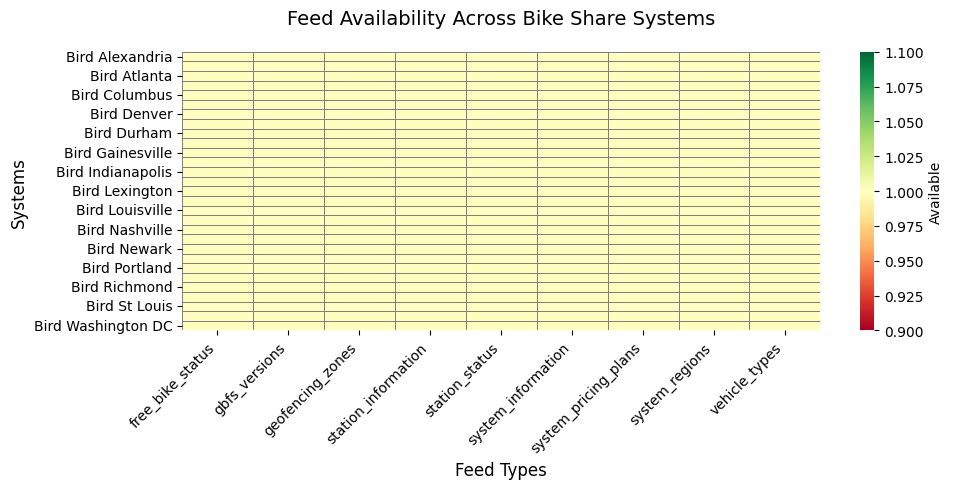


Feed Coverage Summary:
free_bike_status        29
gbfs_versions           29
geofencing_zones        29
station_information     29
station_status          29
system_information      29
system_pricing_plans    29
system_regions          29
vehicle_types           29
dtype: int64


In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Collect data for all systems (THIS WAS MISSING!)
system_feeds = {}

for system in us_systems:
    gbfs_response = requests.get(system['Auto-Discovery URL'])
    
    if gbfs_response.status_code == 200:
        gbfs_data = gbfs_response.json()
        feeds = gbfs_data['data']['en']['feeds']
        feed_names = [feed['name'] for feed in feeds]
        system_feeds[system['Name']] = feed_names

# Get all unique feed types
all_feed_types = set()
for feeds in system_feeds.values():
    all_feed_types.update(feeds)
all_feed_types = sorted(all_feed_types)

# Create matrix: 1 if feed exists, 0 if missing
matrix_data = []
for system_name, feeds in system_feeds.items():
    row = [1 if feed_type in feeds else 0 for feed_type in all_feed_types]
    matrix_data.append(row)

# Create DataFrame
df = pd.DataFrame(matrix_data, 
                  index=list(system_feeds.keys()), 
                  columns=all_feed_types)

# Create heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(df, cmap='RdYlGn', cbar_kws={'label': 'Available'}, 
            linewidths=0.5, linecolor='gray')
plt.title('Feed Availability Across Bike Share Systems', fontsize=14, pad=20)
plt.xlabel('Feed Types', fontsize=12)
plt.ylabel('Systems', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print summary
print("\nFeed Coverage Summary:")
print(df.sum(axis=0).sort_values(ascending=False))

ae_systems = [row for row in all_systems if row['Country Code'] == 'AE' and row['Name'] != 'Yaldi']

for system in ae_systems:
    print(system)

print(f"\nTotal US systems: {len(ae_systems)}")

for system in ae_systems:
    print(f"\n{'='*50}")
    print(f"System: {system['Name']}")
    
    gbfs_response = requests.get(system['Auto-Discovery URL'])
    
    if gbfs_response.status_code == 200:
        gbfs_data = gbfs_response.json()
        feeds = gbfs_data['data']['en']['feeds']
        
        print("Available feeds:")
        for feed in feeds:
            print(f"  - {feed['name']}: {feed['url']}")
    else:
        print(f"Error: Status code {gbfs_response.status_code}")